# Task 1

In [1]:
import cv2
import numpy as np

img = cv2.imread("images.jpg")
img = cv2.resize(img, (0, 0), None, .25, .25)

gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)

horizontalStack = np.concatenate((img, gaussianBlur, meanBlur, sharpen), axis=1)

cv2.imwrite("Output.jpg", horizontalStack)

cv2.imshow("2D Convolution Example", horizontalStack)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Use Filter2D

# Average Filtering with 5x5 Kernel

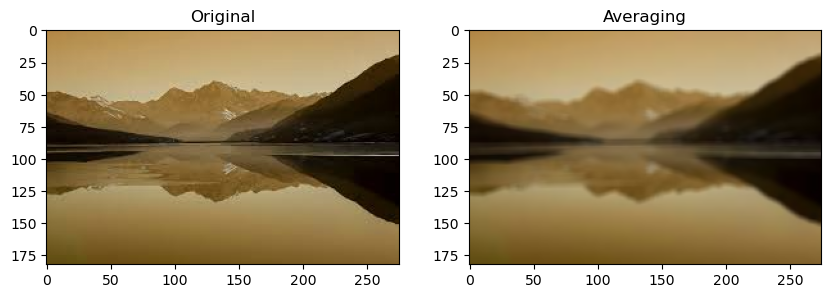

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.show()

# Using blur Function

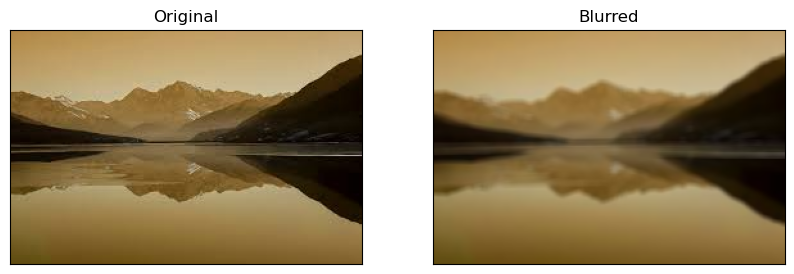

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images.jpg')

blur = cv2.blur(img,(5,5))
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


# Task 1 Some other Functions

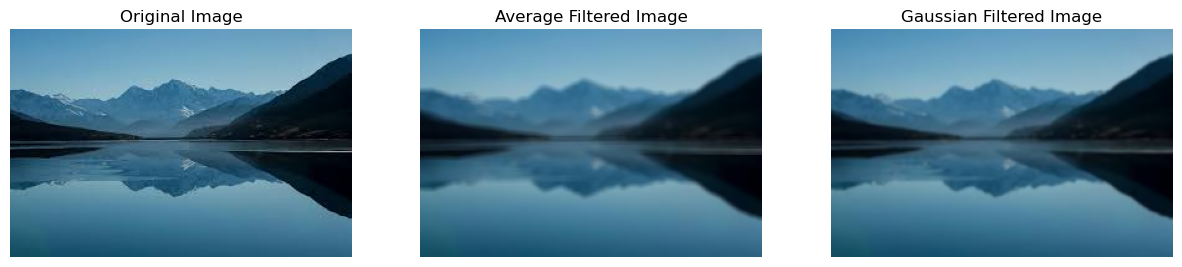

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('images.jpg')
average_filtered = cv2.blur(image, (5, 5))
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)


plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(average_filtered, cv2.COLOR_BGR2RGB))
plt.title('Average Filtered Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.show()

# Task 2

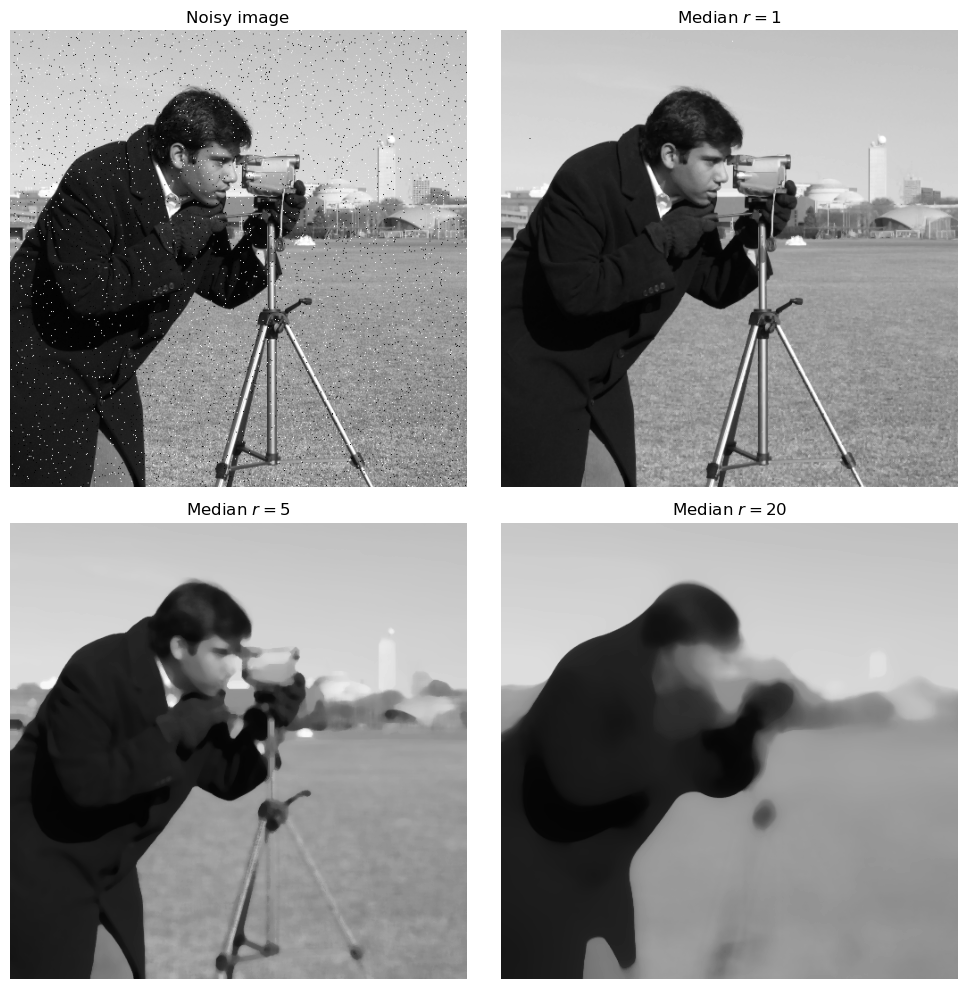

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage import data, img_as_ubyte

# Load an example image and add noise
image = img_as_ubyte(data.camera())
rng = np.random.default_rng()
noise = rng.random(image.shape)
noisy_image = image.copy()
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

# Apply median filtering with different disk sizes
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=1$')

ax[2].imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

ax[3].imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()